# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [19]:
#                       student details 1: Adam K. 8904
#                       student details 2: Ruth D. 5043


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Chatgpt
Goal:להבין איך לבצע את הgrid בצורה נכונה
Propmpt1: https://chatgpt.com/share/68383f19-45b8-8009-b4a5-d6bbb62a5806

AI agent name 2: ChatGPT
Goal:הבנת הלוגיקה של השאלות והבנת הקוד  
Propmpt1:"תסביר לי בבקשה איך לבחור את המודל הכי טוב,ואיך להימנע משגיאות."

AI agent name 3: ChatGPT
Goal:שאלנו את הצאט איך לשלוח משהו שכתוב בצורת מילון לפונקציה
Propmpt1:"תסביר לי בבקשה מה המשמעות של פירוק מילון ואיך לפרק "

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### הסבר על המטלה
<pre>
במקרה הזה מדובר בבעיית סיווג רב מחלקתי. 
קיבלנו דאטה סט של יינות - כל יין מתואר ע"י 13 תכונות כגון: אלכוהול,חומציות, עוצמת צבע וכו'. כל סוג יין משוייך לאחת מ3 הקבוצות שיש בעמודת המטרה (0,1,2). לכן זהו סיווג רב מחלקתי, קיימות יותר מ2 קבוצות אליהן משייכים כל סוג יין. מדוע זו בעיית למידה מונחית? קיים מידע מקדים לגבי כל סוג יין ומהי התווית שלו, ולכן כאשר יגיעו דגימות חדשות, הן יסווגו על בסיס המידע שהיה קיים. מטרת סיווג זה היא ללמוד את ההבדלים בין סוגיי הין כדי ליישם על הדגימות החדשות. 


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [22]:
train_df = pd.read_csv("wine_train.csv")
test_df = pd.read_csv("wine_test.csv")

In [23]:
train_df.head ()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [24]:
test_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [25]:
# we've showed the standard scaling which means : 0 is the average and 1 is standard deviation
X = train_df.drop(columns=["target"])
y = train_df["target"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


X_scaled_df["target"] = y
X_scaled_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,-1.165293,-0.429338,-0.147716,-0.275119,-1.389292,-1.123620,-0.562603,1.479415,0.144876,-1.178572,0.554869,-0.515510,-0.830216,1
1,0.740330,0.259077,1.163262,1.519686,0.370822,-1.202087,-1.221446,0.369703,-0.040628,1.626473,-0.998662,-1.172348,0.023858,2
2,-0.796872,-1.246256,-3.549173,-2.638279,-0.875925,-0.527274,-1.490973,-0.569283,-2.118278,-1.380213,0.417793,-1.144397,-0.703687,1
3,-1.495601,-0.530305,-1.706717,0.024015,-1.022601,0.288779,-0.422849,0.198979,-0.263233,-1.330923,-0.084820,-0.277931,-1.035826,1
4,0.206756,1.167784,-0.750057,0.472716,0.150808,-1.280554,-1.510938,0.711153,-0.485839,-0.461628,-1.638351,-1.340051,0.276917,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.257572,-0.475232,-0.785489,-2.458798,0.004132,0.524179,0.695187,-0.740008,-0.522940,-0.291353,0.417793,1.063695,0.972829,0
138,1.515283,-0.649631,0.419194,-0.873387,0.590836,1.544246,1.863136,-0.227834,0.552986,1.644397,1.240251,0.253130,2.965668,0
139,-1.165293,-1.071858,0.525489,1.370119,-1.609306,-0.495887,-0.482744,0.455066,-0.300334,-1.268190,1.605788,0.113377,-0.355731,1
140,1.527987,-0.493590,0.312898,-1.262262,0.884189,1.497166,1.324083,-0.057109,0.757041,0.770621,0.417793,0.295055,2.238124,0


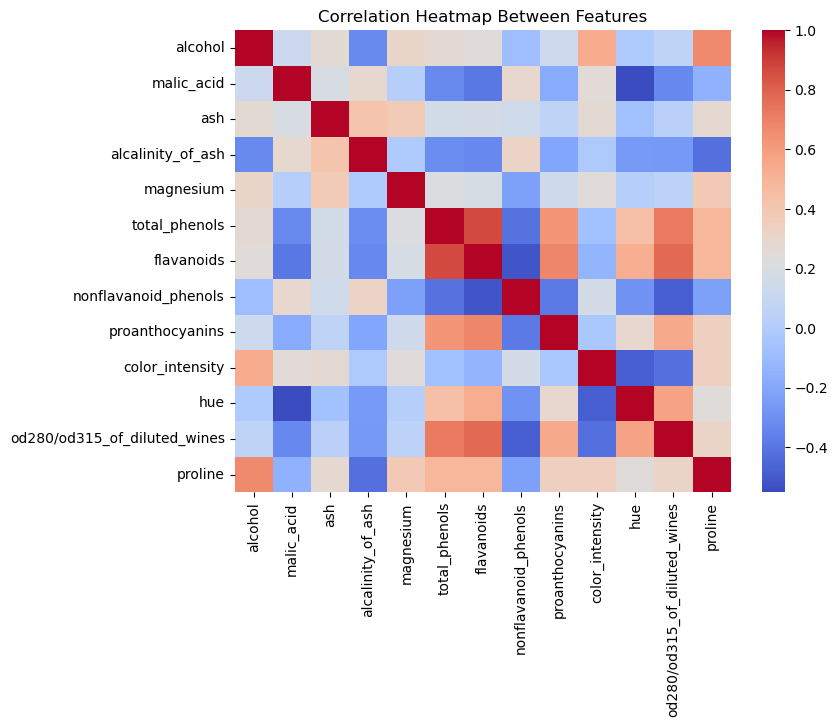

In [26]:
# We've showed a Heatmap that shows the correlation between the features
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.drop("target", axis=1).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap Between Features")
plt.show()


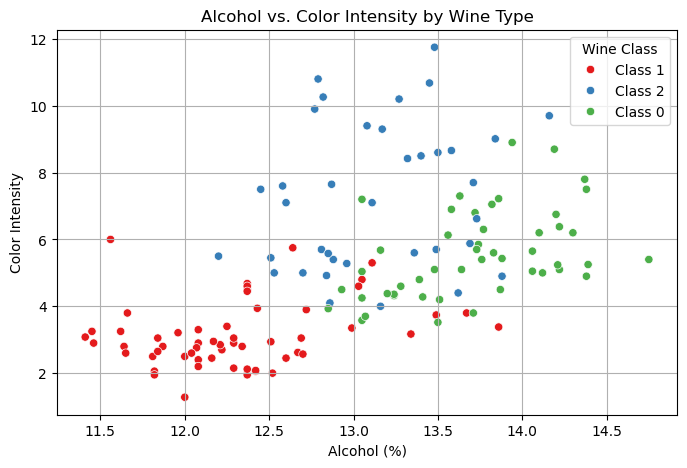

In [27]:
# We've used Scaterplot to show the relation between two features and showed how they act togther 
#there's a visible relation between alcohol and the color of the wine
# it's possible to see that the groups are almost separated
train_df["wine_type"] = train_df["target"].map({
    0: "Class 0",
    1: "Class 1",
    2: "Class 2"
})
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x="alcohol", y="color_intensity", hue="wine_type", palette="Set1")
plt.title("Alcohol vs. Color Intensity by Wine Type")
plt.xlabel("Alcohol (%)")
plt.ylabel("Color Intensity")
plt.legend(title="Wine Class")
plt.grid(True)
plt.show()

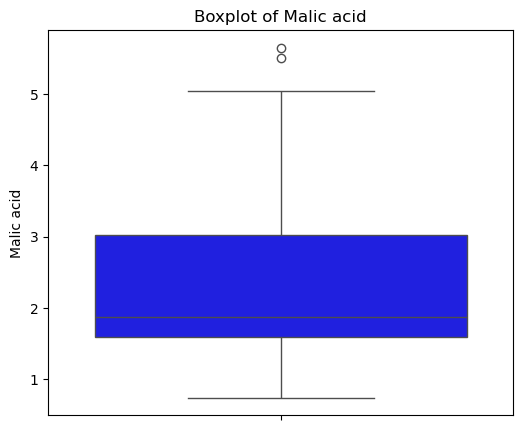

In [28]:
# We've used BoxPlot to find the outliers using the IQR method
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("wine_train.csv")
plt.figure(figsize=(6, 5))
sns.boxplot(y=train_df["malic_acid"], color="blue")
plt.title("Boxplot of Malic acid")
plt.ylabel("Malic acid")
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [29]:
#checking the best combination of model, hyper-parameters and feature engineering.
X = train_df.drop(columns=["target"])
y = train_df["target"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Bonus - feature selection 
def highly_correlated_features(X_train, y_train, X_val=None, threshold=0.9):
    correlation_matrix = X_train.corr().abs()
    columns = correlation_matrix.columns
    to_drop = set()

    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            feature_1 = columns[i]
            feature_2 = columns[j]

            if feature_1 in to_drop or feature_2 in to_drop:
                continue   

            corr_value = correlation_matrix.iloc[i, j]
            if corr_value > threshold:
                corr1 = abs(X_train[feature_1].corr(y_train))
                corr2 = abs(X_train[feature_2].corr(y_train))

                if corr1 > corr2:
                    to_drop.add(feature_2)
                else:
                    to_drop.add(feature_1)

    X_train_filtered = X_train.drop(columns=list(to_drop))
    X_val_filtered = X_val.drop(columns=list(to_drop)) if X_val is not None else None

    return X_train_filtered, X_val_filtered


feature_methods = {
    'StandardScaler': lambda X_train, y_train, X_val: (
        StandardScaler().fit(X_train).transform(X_train),
        StandardScaler().fit(X_train).transform(X_val)
    ),
    'MinMaxScaler': lambda X_train, y_train, X_val: (
        MinMaxScaler().fit(X_train).transform(X_train),
        MinMaxScaler().fit(X_train).transform(X_val)
    ),
    'Correlation_select': highly_correlated_features  
}
#In KNN we check the number of the neighbors and the distances 
#In DecisionTree we limit to a certain depth between 3 and 5 ,and the minimum number of samples required to split an internal node 
#In NaiveBayes we added a small value to the variances and kept the priors without cahnge as none
model_configs = [
    ('KNN', KNeighborsClassifier, {'n_neighbors': [3, 5],'metric':['euclidean','manhattan','chebyshev']}),
    ('DecisionTree', DecisionTreeClassifier, {'max_depth': [3, 5],'min_samples_split': [2, 4],}),
    ('NaiveBayes', GaussianNB, {'var_smoothing': [1e-9, 1e-8],'priors':[None,[0.5,0.3,0.2]]})
]

results = []

#checking all the combinations 
for feat_name, feat_func in feature_methods.items():
    for model_name, model_class, param_grid in model_configs:

        param_keys = list(param_grid.keys())
        
        if len(param_keys) == 2:
            key1, key2 = param_keys[0], param_keys[1]
            values1, values2 = param_grid[key1], param_grid[key2]
            
            for val1 in values1:
                for val2 in values2:
                    f1_scores = []
                    
                    #splitting into train group and validation group
                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

                        X_train_feat, X_val_feat = feat_func(X_train, y_train, X_val)
                        
                        #splitting the dictionary into parameters
                        model = model_class(**{key1: val1, key2: val2})
                        model.fit(X_train_feat, y_train)
                        y_pred = model.predict(X_val_feat)

                        f1 = f1_score(y_val, y_pred, average='macro')
                        f1_scores.append(f1)

                    mean_f1 = np.mean(f1_scores)
                    results.append({
                        'feature_engineering': feat_name,
                        'model': model_name,
                        'params': f"{key1}={val1}, {key2}={val2}",
                        'score': mean_f1
                    })
        
  
#saving the results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='score', ascending=False)
results_df.head()
best_result = results_df.loc[results_df["score"].idxmax()]
print("Best combination:")
print(best_result)

Best combination:
,feature_engineering                       MinMaxScaler
,model                                              KNN
,params                 n_neighbors=5, metric=euclidean
,score                                         0.969724
,Name: 17, dtype: object


In [30]:
results_df = pd.DataFrame(results)
results_df

,feature_engineering,model,params,score
0,StandardScaler,KNN,"n_neighbors=3, metric=euclidean",0.948059
1,StandardScaler,KNN,"n_neighbors=3, metric=manhattan",0.949518
2,StandardScaler,KNN,"n_neighbors=3, metric=chebyshev",0.901396
3,StandardScaler,KNN,"n_neighbors=5, metric=euclidean",0.961087
4,StandardScaler,KNN,"n_neighbors=5, metric=manhattan",0.952793
5,StandardScaler,KNN,"n_neighbors=5, metric=chebyshev",0.920927
6,StandardScaler,DecisionTree,"max_depth=3, min_samples_split=2",0.896526
7,StandardScaler,DecisionTree,"max_depth=3, min_samples_split=4",0.939969
8,StandardScaler,DecisionTree,"max_depth=5, min_samples_split=2",0.884298
9,StandardScaler,DecisionTree,"max_depth=5, min_samples_split=4",0.910457


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [31]:
#We've trained the data with the best combination that was found.
scaler = MinMaxScaler()
x_scaledNew =scaler.fit_transform(X)
model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model.fit(x_scaledNew, y);


## Part 5 - Apply on test and show model performance estimation

In [32]:
#We showed the prediction and the performance estimation and we can see the estimation is almost 1 , it means that most of the prediction are true
X_test = test_df.drop(columns=["target"])
y_test = test_df["target"]
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
for i in range(5):
    print(f"predicted value: {y_pred[i]}, true value:{y_test.values[i]}")




predicted value: 2, true value:2
,predicted value: 0, true value:0
,predicted value: 2, true value:2
,predicted value: 1, true value:1
,predicted value: 2, true value:2


In [33]:
#Evaluation of the model 
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

0.9453734671125975
